<a href="https://colab.research.google.com/github/joshhmzhang/Machine-Learning-Kaggle-competition-Housing-price/blob/master/Housing%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Methodology](#methodology)
* [Exploratory Data Analysis](#analysis)
* [Feature Engineering](#feature)
* [Modelling](#model)


## 1. Introduction<a name="introduction"></a>
The housing price has been booming during the past years. However, what are the deciding factors for the price of the house? How could potential buyers know what is the reasonable price? In this project, the detailed data analysis will be conducted to reavel the secreat of the pricing and the michine learning will be applied for the price prediction. The prediced results could be a valuable guide for the buyers in addition to the realeaste agent. The dataset is avaible from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data




## 2. Methodology <a name="methodology"></a>

First, the explortory analysis will be conducted to reveal the general information:
* Clean the dataset
* Investigate the relationship between the relevant features and the target 
* Articulate the findings using a deliverable with visualizations 
* Feature selection with ANOVA, Lasso regression and RFE for machine learning in the next step


Second step in our analysis will focus on modelling:
* Random Forest, XGBoost and LGB are applied.



## 3. Exploratory Data Analisis<a name="analysis"></a>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning
from sklearn.impute import SimpleImputer

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import f_oneway

# Models
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

# Display all columns
pd.options.display.max_columns=None
home_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/housing price/train.csv')
home_data_competition=pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/housing price/test.csv')

home_data.head()



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
home_data_competition.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print('The traning data shape:')
print(home_data.shape)

print('The competition data shape:')
print(home_data_competition.shape)


The traning data shape:
(1460, 81)
The competition data shape:
(1459, 80)


In [ ]:
# statistics for numerical features
home_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are some outliers and there are a lot variance between max and min values. We will use standard sacle to transform the data.

In [ ]:
# statistics for categorical features
home_data.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.1 Numeric Features

In [ ]:
#group numeric features
numeric_features=home_data.select_dtypes(include=(np.number)).columns
print(numeric_features)
print("There are {} numeric features".format(len(numeric_features)))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
There are 38 numeric features


#### 3.1.1 Numeric Features - Distribution

In [ ]:
home_data[numeric_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
#Distributions of numerical features
f=pd.melt(home_data[numeric_features],value_vars=sorted(numeric_features))
f.head()

,variable,value
0,1stFlrSF,856.0
1,1stFlrSF,1262.0
2,1stFlrSF,920.0
3,1stFlrSF,961.0
4,1stFlrSF,1145.0


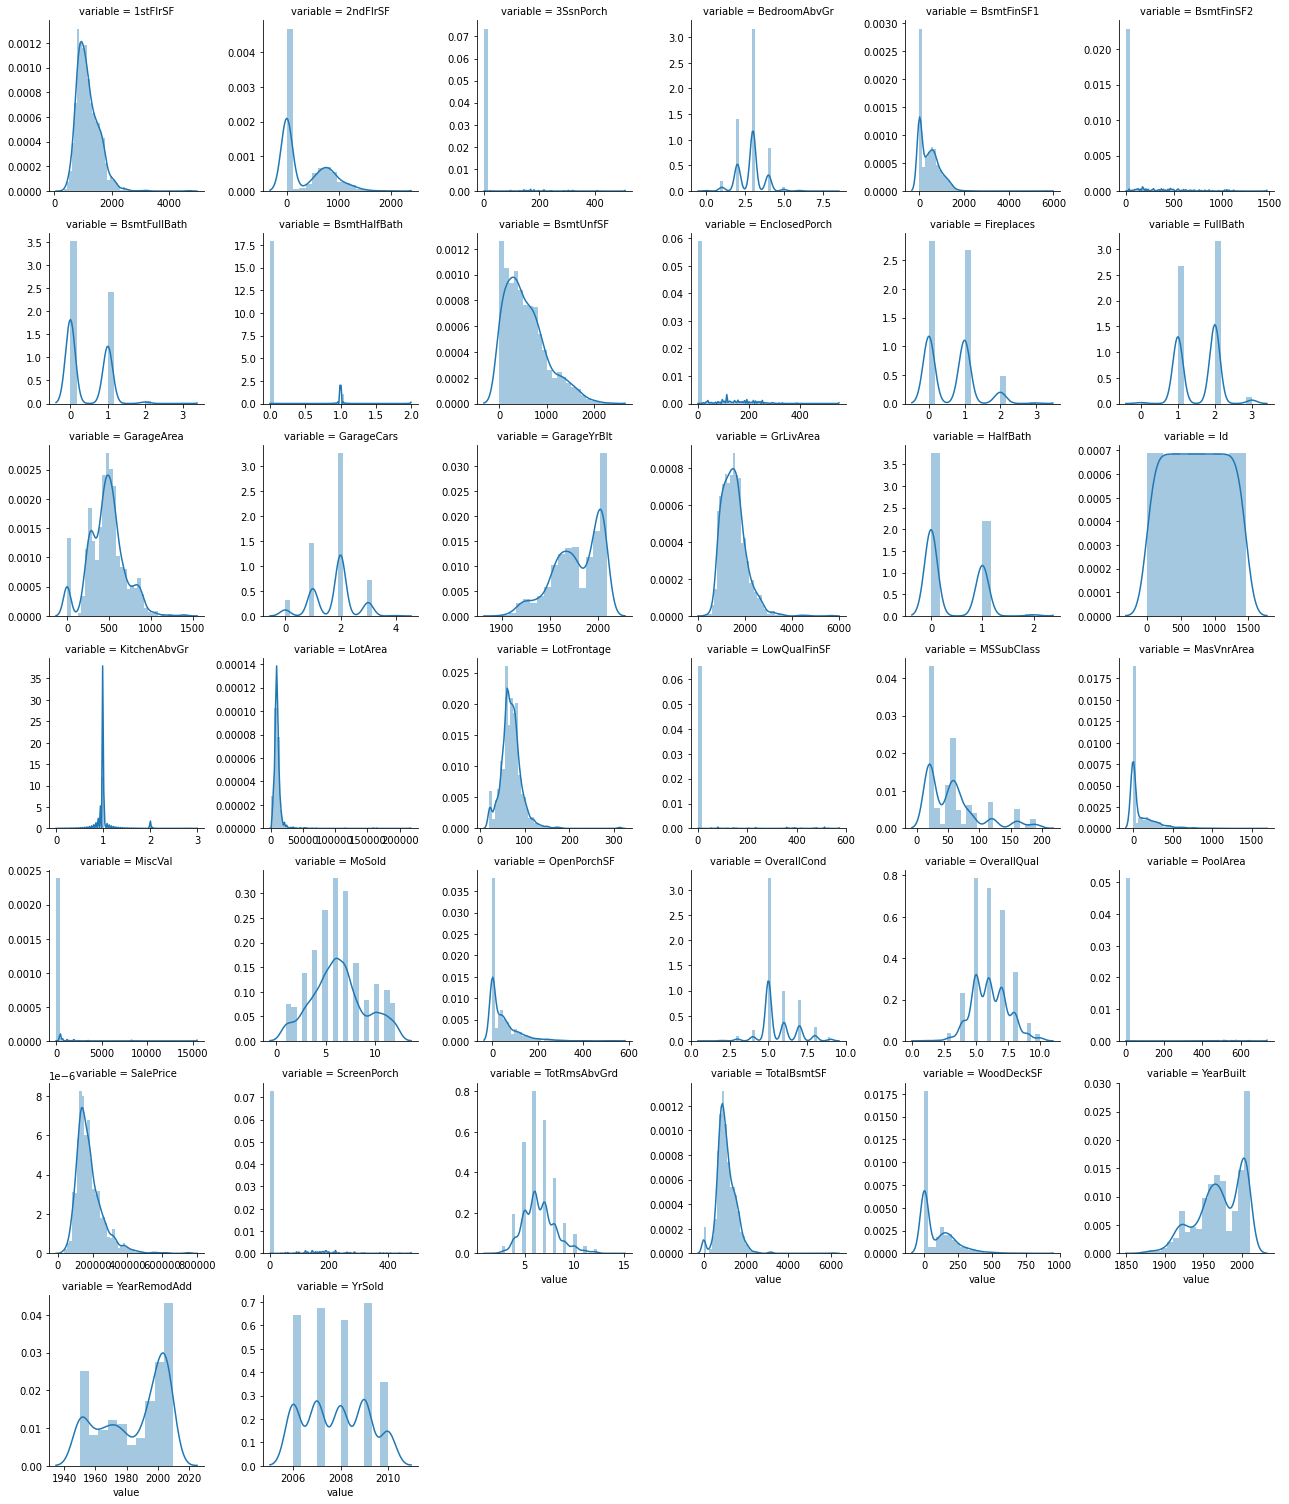

In [ ]:

g=sns.FacetGrid(f,col='variable',col_wrap=6,sharex=False,sharey=False)
g=g.map(sns.distplot,'value')

#### 3.1.2 Numeric Features - variance

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


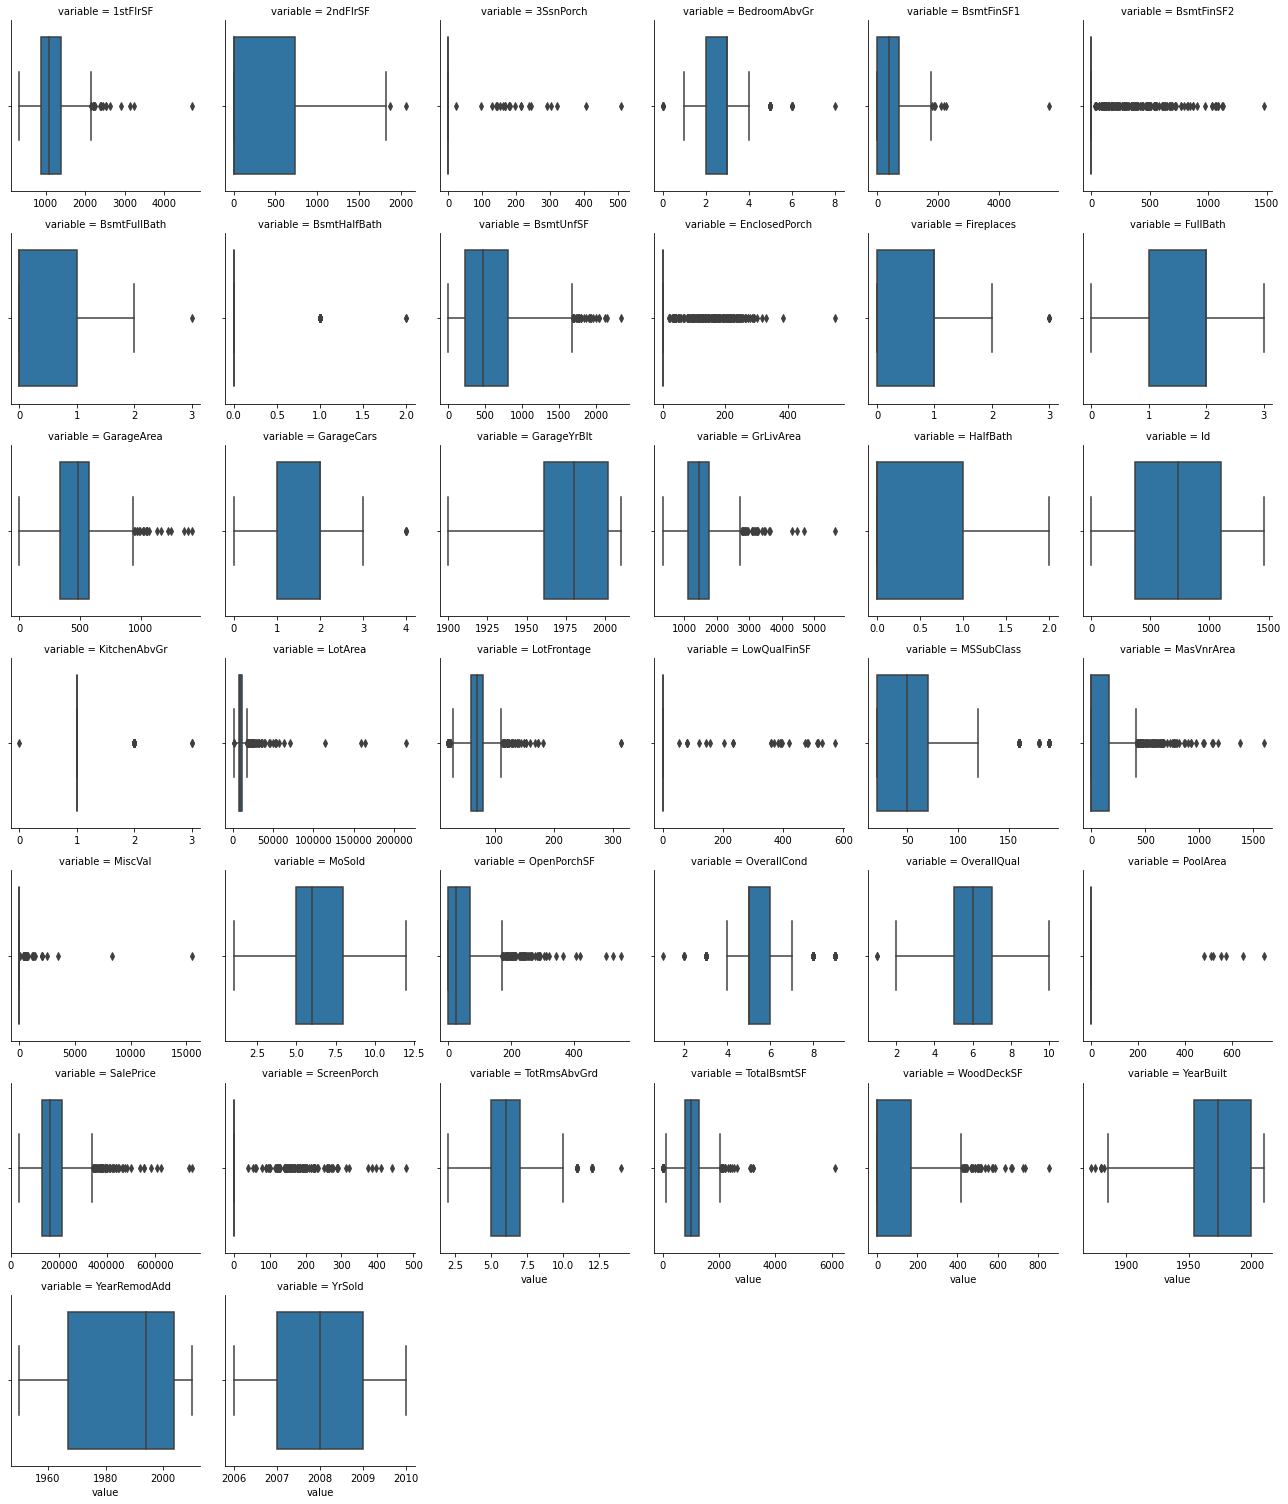

In [ ]:
g=sns.FacetGrid(f,col='variable',col_wrap=6,sharex=False,sharey=False)
g=g.map(sns.boxplot,'value')

In [ ]:

home_data[numeric_features].var()

Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

no other numerical features with too samll variance

#### 3.1.3 Numeric Features vs. SalePrice

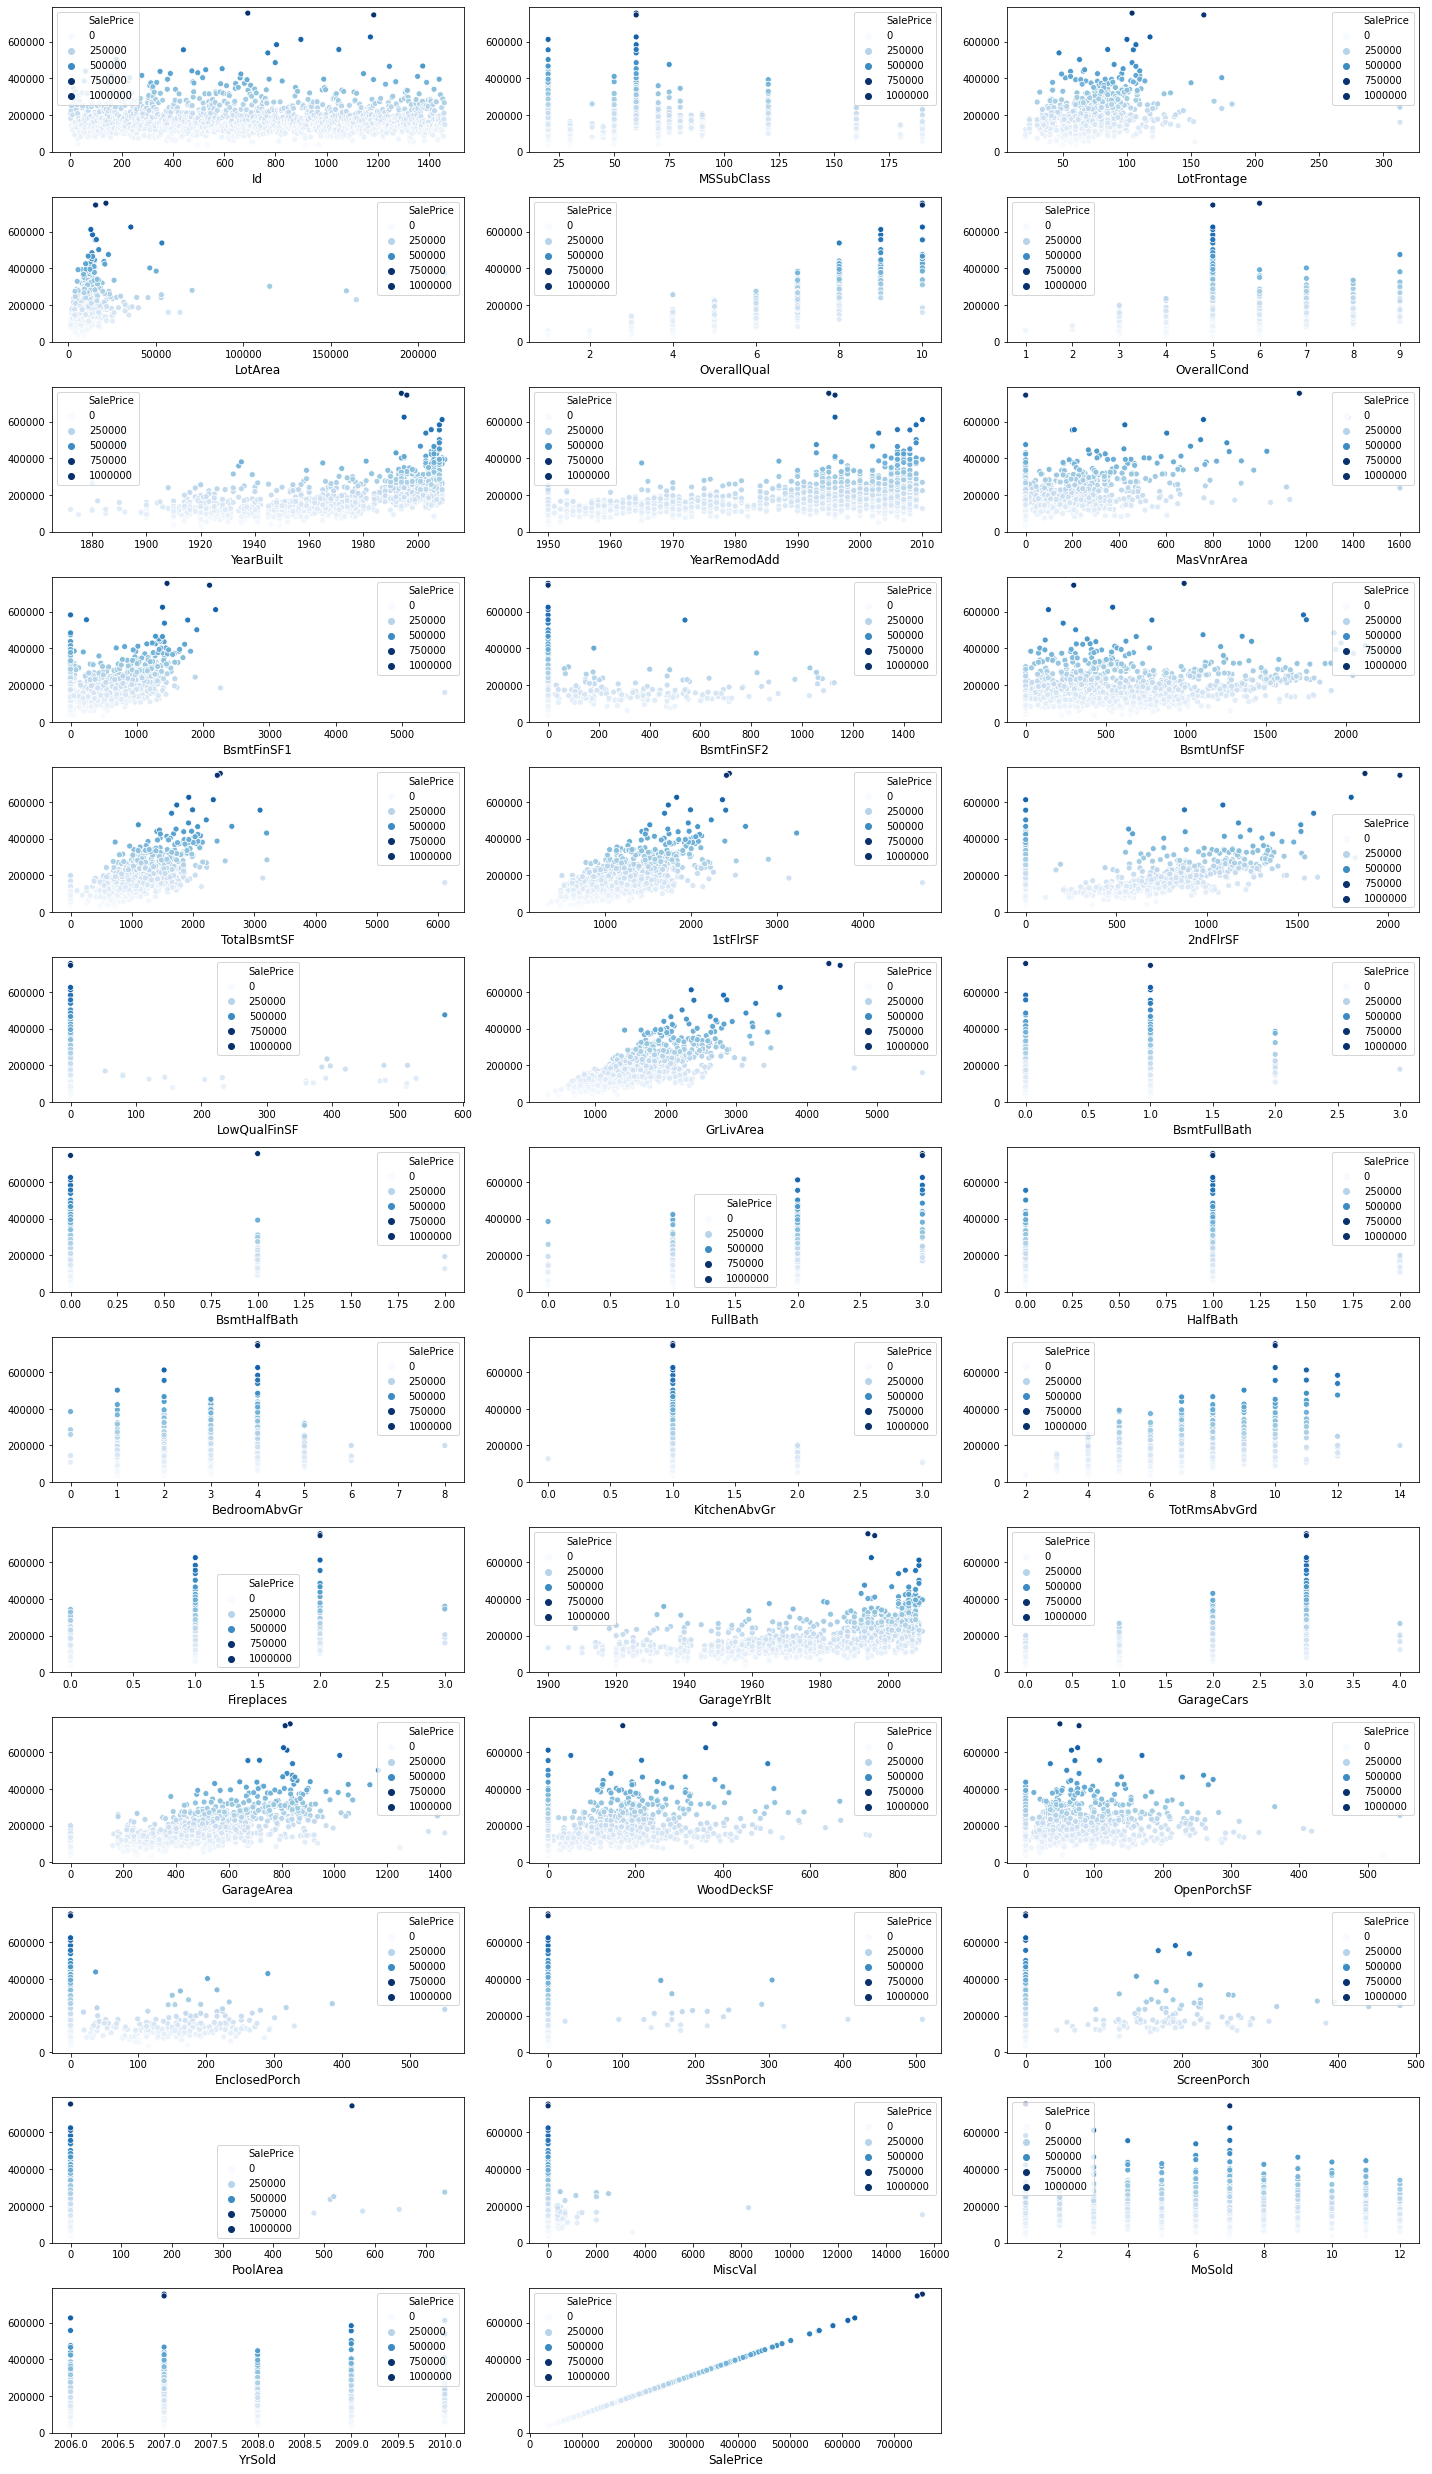

In [ ]:
# visualising numerical features vs SalePrice   
plt.subplots(figsize=(20, 100))
#plt.subplots_adjust(hspace=0.3,wspace=0.2,right=2,top=1)
for i, feature in enumerate(home_data[numeric_features], 1):      #enumerate:print index and the relevant value ,star from 1
    plt.subplot(len(numeric_features), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=home_data)    
    plt.xlabel('{}'.format(feature), fontsize=12)
    plt.ylabel('')
    plt.legend(loc='best',prop={'size': 10})
plt.tight_layout()        
plt.show()

#### 3.1.4 Numeric Features - correlation matrix 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5]), <a list of 37 Text major ticklabel objects>)

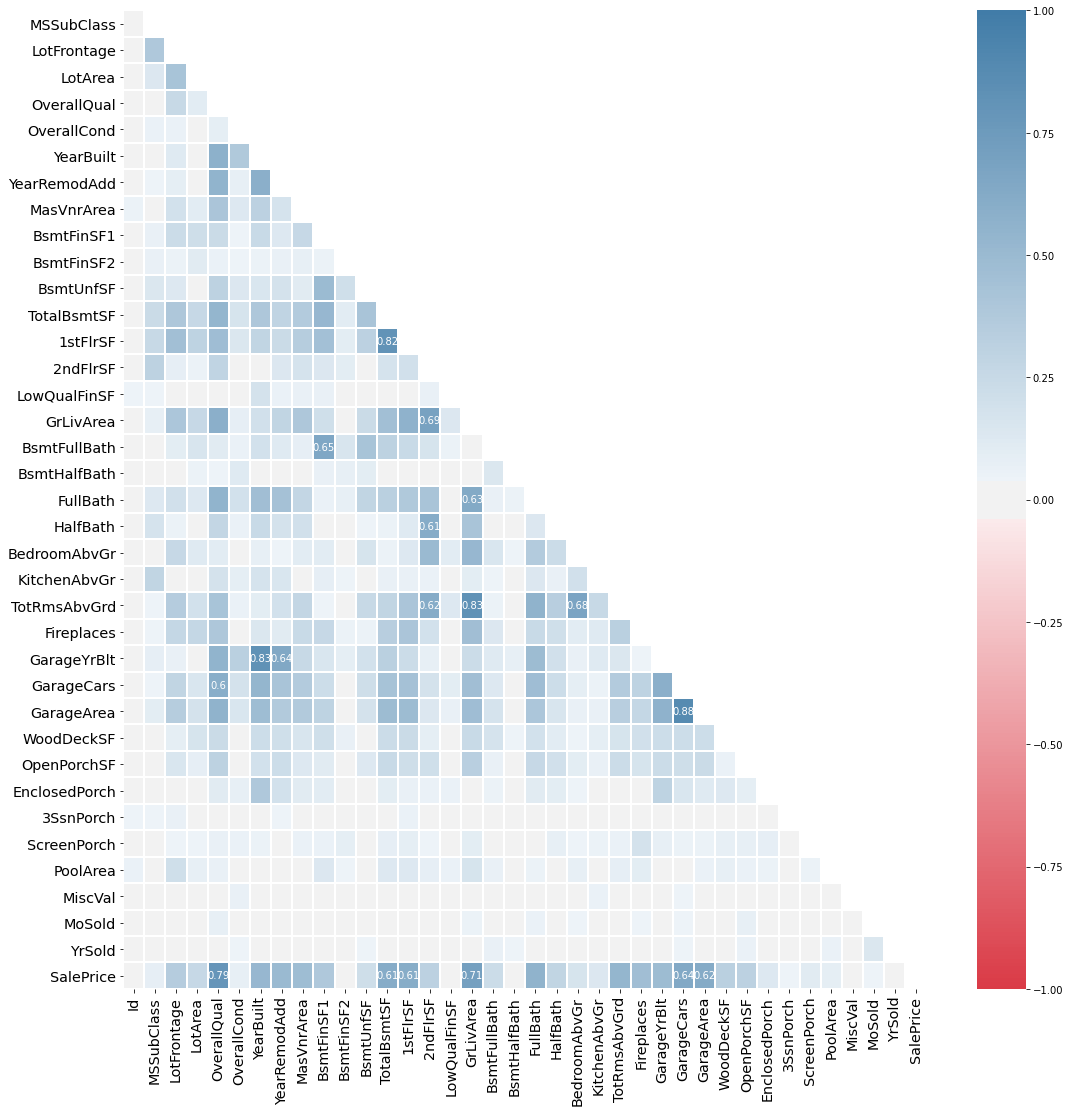

In [ ]:
# create a triangular mask to avoid repeated values 
# and make the plot easier to read
corr = home_data[numeric_features].corr().iloc[1:]
cmap=sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
mask = np.triu(np.ones_like(corr), k=1)

plt.figure(figsize=(18,18))
ax=sns.heatmap(abs(corr), center=0, vmin=-1, vmax=1, cmap=cmap,linewidths=1, mask=mask,annot=True, fmt='.2f')  #cmap='RdBu' 
# format the text in the plot to make it easier to read
for text in ax.texts:
    t = float(text.get_text())
    if -0.6 < t < 0.6:
        text.set_text('')
    else:
        text.set_text(round(t, 2))
plt.xticks(rotation=90,size='x-large')
plt.yticks(rotation=0,size='x-large')


The heatmap shows there are some features that have the corelation as high as 0.8: 1stFlrSF & TotalBsmtSF; GarageYrBlt & YearBuilt; TotRmsAbvGrd & GrLivArea ; GarageArae & GarageCars

GarageYrBlt & YearBuilt: since GarageYrBlt has some null, and close related to YearBuilt, I will remove the GarageYrBlt.

TotRmsAbvGrd (Total rooms above ground (does not include bathrooms)) & GrLivArea( Above ground living area square feet) : we may combine them to a new feature "avg room size"

GarageArae & GarageCars: from the scatter plot below, we can see in some cases, people park fewer cars in larger garage, so we reomve the GarageCars 

### 3.2 Categorcal Features 

In [ ]:
#group categorical features
categ_features=home_data.select_dtypes(exclude=(np.number)).columns
#convert "object" to "category"
home_data[categ_features]=home_data[categ_features].astype('category')
print(categ_features)
print("There are {} category features".format(len(categ_features)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
There are 43 category features


In [ ]:
home_data[categ_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### 3.2.1 Categorcal Features - BoxPlot

In [ ]:
f=pd.melt(home_data,id_vars='SalePrice',value_vars=sorted(categ_features))
f.head()

,SalePrice,variable,value
0,208500,Alley,NaN
1,181500,Alley,NaN
2,223500,Alley,NaN
3,140000,Alley,NaN
4,250000,Alley,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


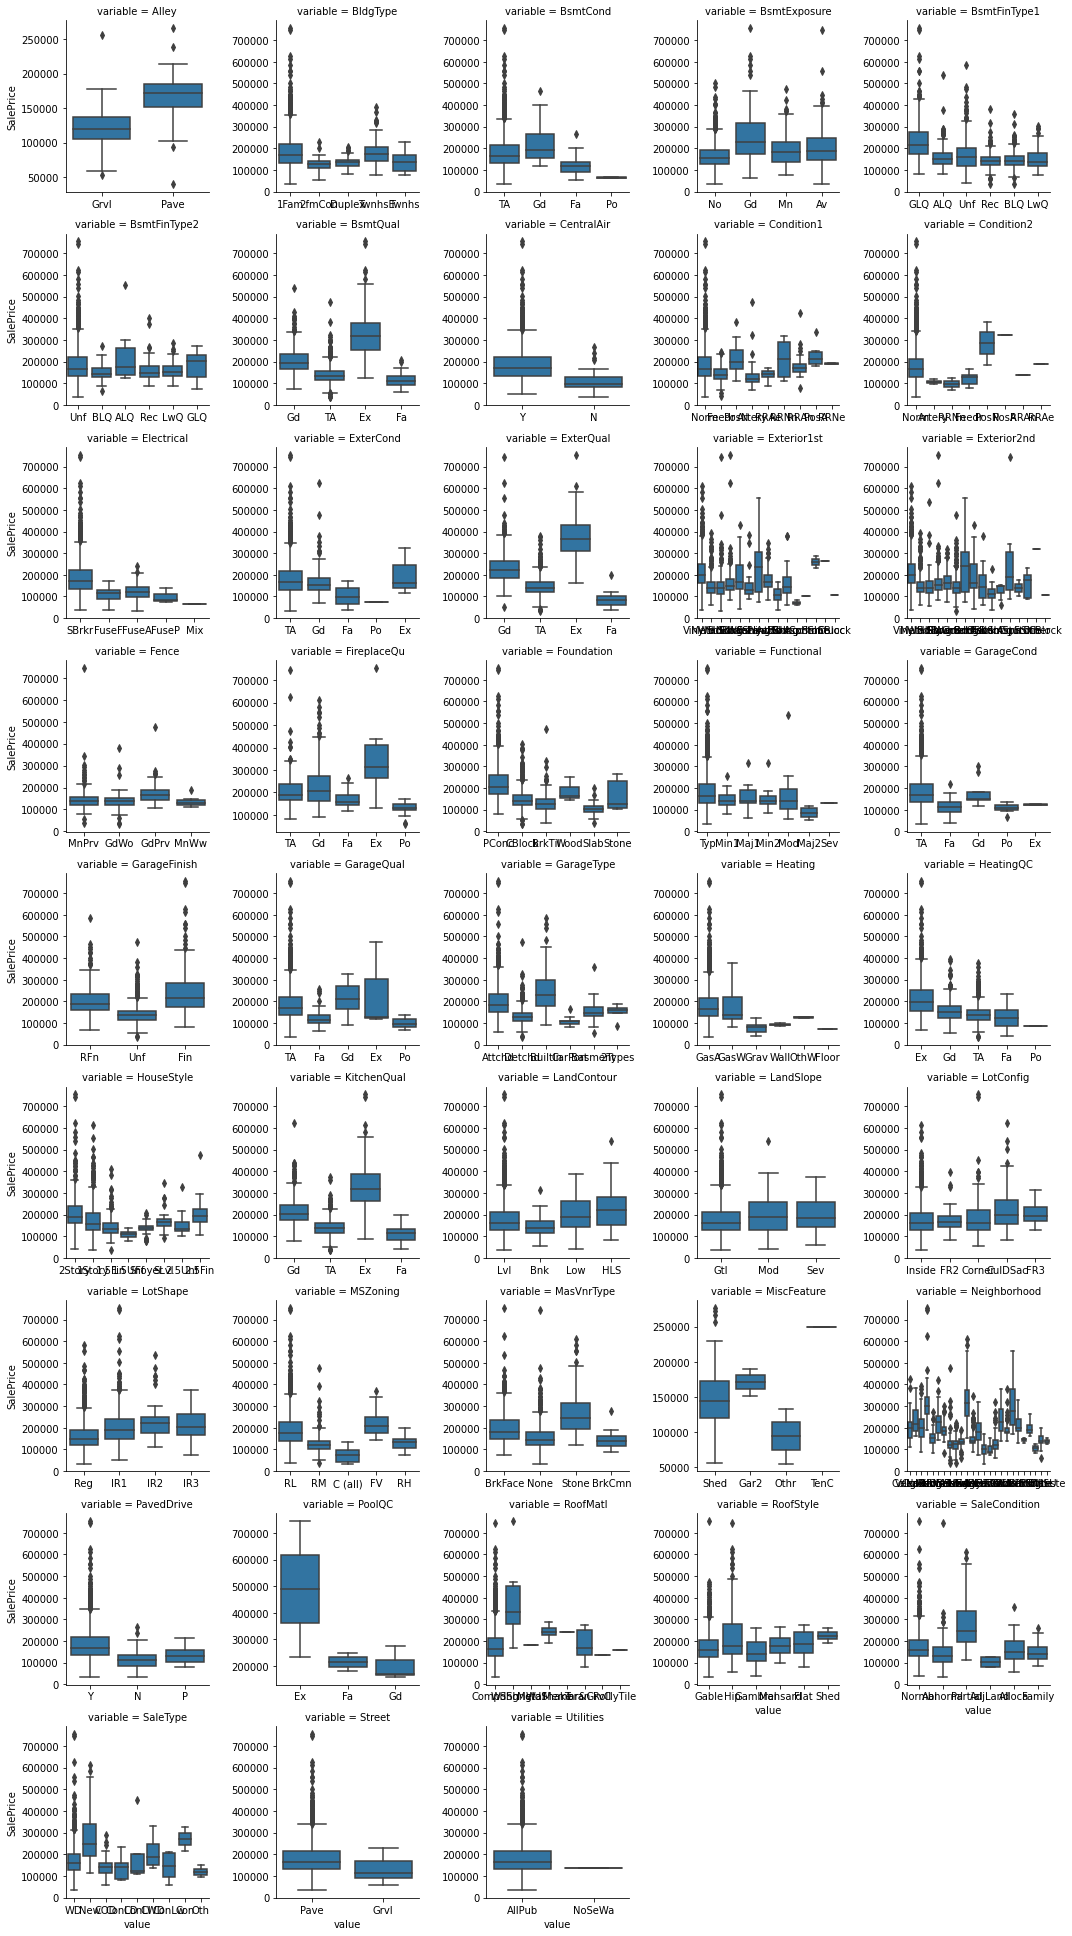

In [ ]:
g=sns.FacetGrid(f,col='variable',col_wrap=5,sharex=False,sharey=False)
g=g.map(sns.boxplot,'value','SalePrice') 
g.fig.tight_layout()

Some Categorical features have great effect on the saleprice: BsmtQual,Condition2,and Neighborhood 

#### 3.2.2 Categorical Features - ANOVA

In [ ]:
# fillna with 'missing' since ANOVA will have error for NaN
home_data_anova=home_data.copy()
for cat in categ_features:
    home_data_anova[cat] = home_data_anova[cat].cat.add_categories('Missing').fillna('Missing')

# fit ANOVA    
anova={'feature':[],'f':[],'p':[]}
for cat in categ_features:
    group_price=[]
    for group in home_data_anova[cat].unique():
        group_price.append(home_data_anova[home_data_anova[cat]==group]['SalePrice'].values)
    f,p=f_oneway(*group_price)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova=pd.DataFrame(anova,columns=['feature','f','p'])
anova.sort_values('p',inplace=True)



In [ ]:
anova

,feature,f,p
8,Neighborhood,71.784865,1.558600e-225
18,ExterQual,443.334831,1.439551e-204
21,BsmtQual,316.148635,8.158548e-196
30,KitchenQual,407.806352,3.032213e-192
34,GarageFinish,213.867028,6.228747e-115
32,FireplaceQu,121.075121,2.971217e-107
20,Foundation,100.253851,5.791895e-91
33,GarageType,80.379992,6.117026e-87
24,BsmtFinType1,64.688200,2.386358e-71
27,HeatingQC,88.394462,2.667062e-67


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

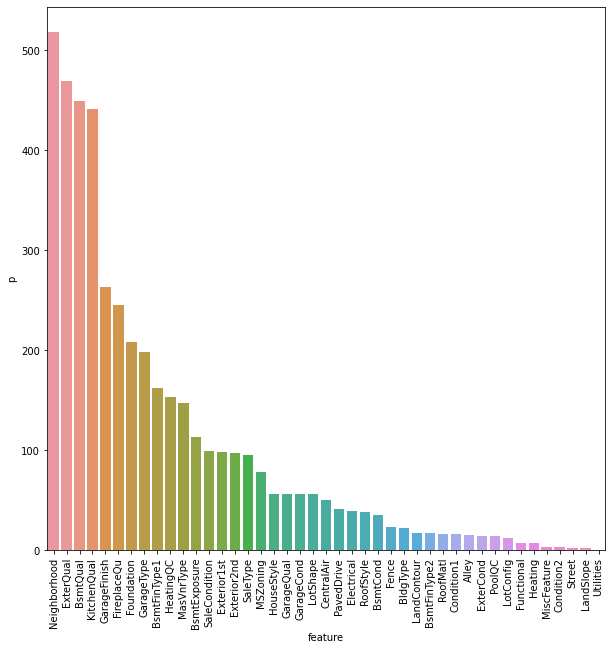

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(anova['feature'],np.log(1./anova['p']))  ## transfer p for better visualisation
plt.xticks(rotation=90)


Here is ANOVA analysis on the influence of categorical variable on SalePrice. The test shows the same results to boxplot

## 4 Feature Engineering<a name="feature"></a> 

In [ ]:
home_data.shape

(1460, 81)

In [ ]:
home_data_competition.shape

(1459, 80)

In [ ]:
#concatenate the train and test data in the same dataframe
ntrain = home_data.shape[0]
y = home_data['SalePrice'].values
ntest = home_data_competition.shape[0]
all_data = pd.concat((home_data, home_data_competition),sort=False).reset_index(drop=True)
all_data.drop(['SalePrice','Id'], axis=1, inplace=True)
print("All_data size is : {}".format(all_data.shape))

All_data size is : (2919, 79)


### 4.1 Numeric Feature - Feature Generation

In [ ]:
#update numeric columns
numeric_features=all_data.select_dtypes(include='number').columns
all_data[numeric_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


In [ ]:
#1stFlrSF 2ndFlrSF GrLivArea
(all_data['1stFlrSF']+all_data['2ndFlrSF']==all_data.GrLivArea).sum()/len(all_data)

0.986296676944159

98% data shows the TotalBsmtSF is the sum of BsmtFinSF1	and BsmtUnfSF.	


In [ ]:
# drop "1stFlrSF", "2ndFlrSF"
all_data.drop(["1stFlrSF", "2ndFlrSF"],axis=1,inplace=True)

In [ ]:
#BsmtFinSF1,BsmtUnfSF, BsmtFinSF2, TotalBsmtSF
(all_data.BsmtFinSF1+all_data.BsmtUnfSF+all_data.BsmtFinSF2==all_data.TotalBsmtSF).sum()/len(all_data)

0.999657416923604

100% data shows the TotalBsmtSF is the sum of BsmtFinSF1,BsmtFinSF2	and BsmtUnfSF.

In [ ]:
# drop "BsmtFinSF1","BsmtUnfSF","BsmtFinSF2"
all_data.drop(["BsmtFinSF1","BsmtUnfSF","BsmtFinSF2"],axis=1,inplace=True)

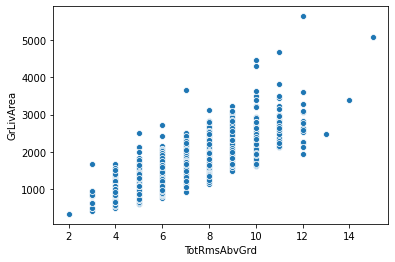

In [ ]:
#TotRmsAbvGrd, GrLivArea
sns.scatterplot(x='TotRmsAbvGrd',y='GrLivArea',data=all_data)

In [ ]:
# create new feature: average room size
all_data['avg_size_room']=all_data.GrLivArea/all_data.TotRmsAbvGrd
all_data.drop(['GrLivArea','TotRmsAbvGrd'],axis=1,inplace=True)

In [ ]:
# BsmtFullBath BsmtHalfBath FullBath HalfBath create new feature: total Bath
all_data['totlbath']=all_data.BsmtFullBath+all_data.BsmtHalfBath+all_data.FullBath+all_data.HalfBath
all_data.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'],axis=1,inplace=True)

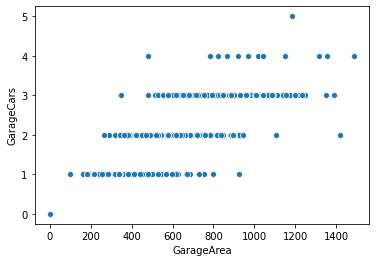

In [ ]:
#'GarageArea','GarageCars','GarageYrBlt'
sns.scatterplot(x='GarageArea',y='GarageCars',data=all_data)

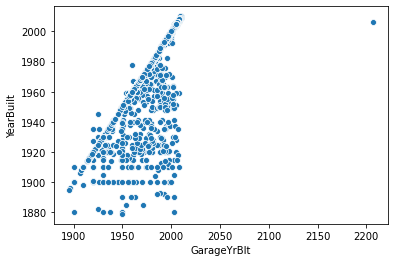

In [ ]:
sns.scatterplot(x='GarageYrBlt',y='YearBuilt',data=all_data)

Wrong data is found here: "Garage built year" should not be 2200. Since the pearson r of these two is more than 0.8, we drop the GarageYrBlt

In [ ]:
all_data.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
# drop "GarageArea" since pearson r between saleprice of GarageCars is higher
all_data.drop(['GarageArea'],axis=1,inplace=True)

In [ ]:
# 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'; create new feature: total porch
all_data['totlporch']=all_data.OpenPorchSF+all_data.EnclosedPorch+all_data['3SsnPorch']+all_data.ScreenPorch
all_data.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],axis=1,inplace=True)

In [ ]:
#PoolArea; update numeric feature list
(all_data.PoolArea==0).sum()/len(all_data)

0.9955464200068517

Tere are 99% does not have the pool and from the heatmap, we can see the crelation between pool and saleprice is weak, so we will drop it

In [ ]:
all_data.drop('PoolArea',axis=1,inplace=True)

In [ ]:
#'Year Remod/Add' , 'Year Built' , 'YrSold'
all_data['years_until_built'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['years_until_remod']=all_data['YrSold'] - all_data['YearRemodAdd']

In [ ]:
all_data[['YearBuilt','YearRemodAdd','YrSold','years_until_built','years_until_remod']].head()

,YearBuilt,YearRemodAdd,YrSold,years_until_built,years_until_remod
0,2003,2003,2008,5,5
1,1976,1976,2007,31,31
2,2001,2002,2008,7,6
3,1915,1970,2006,91,36
4,2000,2000,2008,8,8


In [ ]:
all_data.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

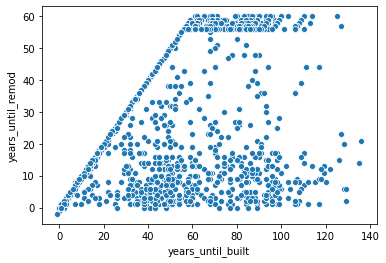

In [ ]:
sns.scatterplot(x='years_until_built',y='years_until_remod',data=all_data)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

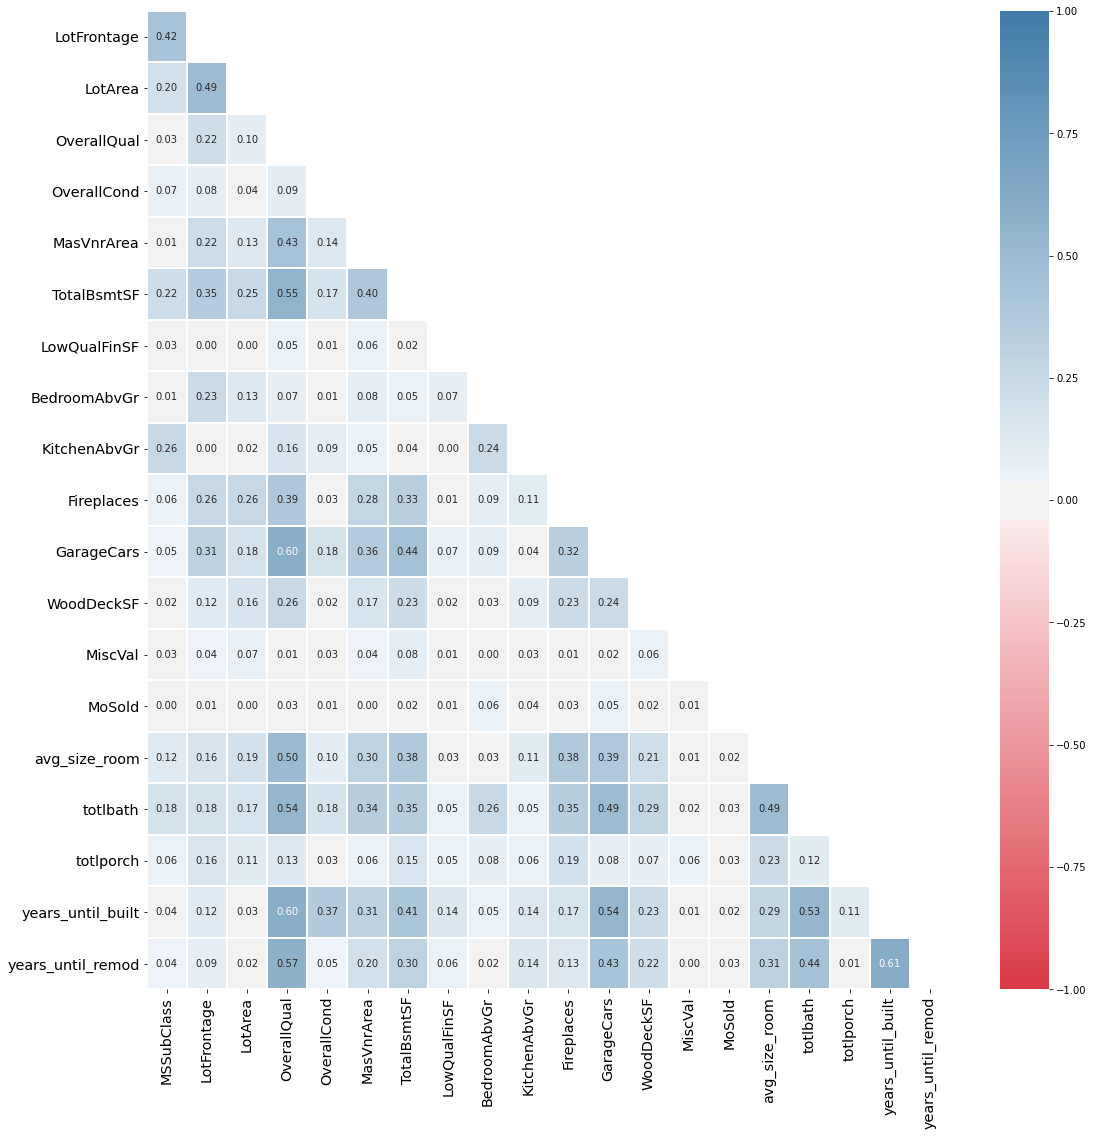

In [ ]:
numeric_features=all_data.select_dtypes(include='number').columns
# create a triangular mask to avoid repeated values 
# and make the plot easier to read
corr = all_data[numeric_features].corr().iloc[1:]
cmap=sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
mask = np.triu(np.ones_like(corr), k=1)

plt.figure(figsize=(18,18))
ax=sns.heatmap(abs(corr), center=0, vmin=-1, vmax=1, cmap=cmap,linewidths=1, mask=mask,annot=True, fmt='.2f')  #cmap='RdBu' 
# format the text in the plot to make it easier to read
#for text in ax.texts:
#    t = float(text.get_text())
#    if -0.6 < t < 0.6:
#        text.set_text('')
#    else:
#        text.set_text(round(t, 2))
plt.xticks(rotation=90,size='x-large')
plt.yticks(rotation=0,size='x-large')

In [ ]:
print("There are {} out of 38 numeric features left".format(len(numeric_features)))

There are 20 out of 38 numeric features left


### 4.2 Numeric Feature -  Missing values 

In [ ]:
#find out if too many missing values
all_data[numeric_features].isnull().sum()[all_data[numeric_features].isnull().sum()>0]/len(all_data)

LotFrontage    0.166495
MasVnrArea     0.007879
TotalBsmtSF    0.000343
GarageCars     0.000343
totlbath       0.000685
dtype: float64

No features missing more than 20% values, so no feature will be droped

In [ ]:
# the code to remove features with 50% missing features
#mask=home_data[numeric].isnull().sum()/len(home_data)<0.5
#home_data[numeric]=home_data[numeric].loc[:,mask]

In [ ]:
#get the numerical columns with missing values 
num_missing_columns=all_data[numeric_features].isnull().sum()[all_data[numeric_features].isnull().sum()>0].index

In [ ]:
all_data[num_missing_columns].head()

,LotFrontage,MasVnrArea,TotalBsmtSF,GarageCars,totlbath
0,65.0,196.0,856.0,2.0,4.0
1,80.0,0.0,1262.0,2.0,3.0
2,68.0,162.0,920.0,2.0,4.0
3,60.0,0.0,756.0,3.0,2.0
4,84.0,350.0,1145.0,3.0,4.0


In [ ]:
#checing if having 0 values for these features
print('MasVnrArea:',sum(all_data['MasVnrArea']==0),'TotalBsmtSF:',sum(all_data['TotalBsmtSF']==0),
      'GarageCars:',sum(all_data['GarageCars']==0),'LotFrontage:',sum(all_data['LotFrontage']==0),
      'totlbath:',sum(all_data['totlbath']==0))


MasVnrArea: 1738 TotalBsmtSF: 78 GarageCars: 157 LotFrontage: 0 totlbath: 0


only 'totlbath' and 'LotFrontage' only conain Nan and donot have 0 value

In [ ]:
# totlbath; it is odd that a house without a bath
all_data[all_data.totlbath.isnull()][numeric_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,MiscVal,MoSold,avg_size_room,totlbath,totlporch,years_until_built,years_until_remod
2120,20,99.0,5940,4,7,0.0,NaN,0,2,1,0,1.0,0,0,4,224.000000,NaN,0,62,58
2188,20,123.0,47007,5,7,0.0,0.0,0,5,1,2,2.0,0,0,7,347.272727,NaN,372,49,12


In [ ]:
#since only 2 without the bath , we will fillna with median
all_data['totlbath']=all_data['totlbath'].fillna(all_data['totlbath'].median())


In [ ]:
#LotFrontage: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, 
#we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
                          lambda x: x.fillna(x.median()))

In [ ]:
#'MasVnrArea','TotalBsmtSF','GarageArea' 
#except for LotFrontage and totlbath, all other features have 0, so replace nan with 0
all_data[['MasVnrArea','TotalBsmtSF','GarageCars']]=\
          all_data[['MasVnrArea','TotalBsmtSF','GarageCars']].fillna(0)

In [ ]:
all_data[numeric_features].isnull().sum().sum()

0

### 4.3 Categorical features - Feature selection by ANOVA

In [ ]:
all_data[categ_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [ ]:
#only pick significant features based on ANOVA
droped=list(anova.query('p>0.05').feature.values)
all_data.drop(droped,axis=1,inplace=True)

In [ ]:
categ_features=all_data.select_dtypes(exclude='number').columns
len(categ_features)

40

### 4.4 Categorical features - Missing values

In [ ]:

missing_counts=all_data[categ_features].isnull().sum()/len(all_data)*100
missing_counts=missing_counts[missing_counts>0]
missing_counts.sort_values(ascending=False)


PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
GarageCond       5.447071
GarageQual       5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MSZoning         0.137033
Functional       0.068517
Exterior1st      0.034258
SaleType         0.034258
Exterior2nd      0.034258
KitchenQual      0.034258
Electrical       0.034258
dtype: float64

In [ ]:
#drop all features with more than 40% missing values
droped=list(missing_counts[missing_counts>40].index)
all_data.drop(columns=droped,inplace=True)

In [ ]:
categ_features=all_data.select_dtypes(exclude='number').columns

In [ ]:
all_data[categ_features].head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
all_data[categ_features].isnull().sum()

MSZoning           4
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

In [ ]:
#for nan value more than 24, all imputer with"none" as indicated in the data description 
missing_columns=all_data.isnull().sum()[all_data.isnull().sum()>20].index
all_data[missing_columns]=all_data[missing_columns].fillna('none')

In [ ]:
#for all others, we imputer with most _frequent
missing_columns=all_data.isnull().sum()[all_data.isnull().sum()>0].index
imputer = SimpleImputer(strategy='most_frequent')
all_data[missing_columns]=imputer.fit_transform(all_data[missing_columns])

In [ ]:
all_data[categ_features].isnull().sum().sum()

0

### 4.5 Categorical Data - Ordinal Features - simple encoding

In [ ]:
all_data[categ_features].head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
ordcol=['Condition1',	'Condition2','ExterQual', 'ExterCond', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','Functional',
        'KitchenQual', 'GarageQual', 'GarageFinish','GarageCond', 'SaleCondition','PavedDrive','CentralAir','HeatingQC','LandContour']

In [ ]:
#applied label encoding for ordinal features
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in ordcol:
    all_data[col]=label_encoder.fit_transform(all_data[col])


In [ ]:
# update category features
categ_features=all_data.select_dtypes(exclude='number').columns


In [ ]:
all_data[categ_features].head()

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,GarageType,SaleType
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,WD
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Attchd,WD
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,WD
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Detchd,WD
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,WD


### 4.6 Categorical Data - Binary encodeing - Cardinality_columns - 

In [ ]:
for col in categ_features:
    print(col+':'+ str(all_data[col].nunique()))

MSZoning:5
LotShape:4
LotConfig:5
Neighborhood:25
BldgType:5
HouseStyle:8
RoofStyle:6
RoofMatl:8
Exterior1st:15
Exterior2nd:16
MasVnrType:5
Foundation:6
Heating:6
GarageType:7
SaleType:9


In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 2.5MB/s 


In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder()
df_binary = encoder.fit_transform(all_data[categ_features])


In [ ]:
df_binary.head()

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,BldgType_0,BldgType_1,BldgType_2,BldgType_3,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Heating_0,Heating_1,Heating_2,Heating_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


In [ ]:

all_data=pd.concat([all_data, df_binary], axis=1, sort=False)

In [ ]:
all_data=all_data.drop(columns=categ_features,axis=1)

In [ ]:
all_data.shape

(2919, 104)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 104 entries, MSSubClass to SaleType_4
dtypes: float64(6), int64(98)
memory usage: 2.3 MB


### 4.7 Features Selection 

In [ ]:
# spit all_data to obtain the tainnig and test data
X = all_data[0:ntrain]
competition = all_data[ntrain:]

In [ ]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)
# Applied cross validation to test the model
def rmse(model,X,y):
    cv_score=cross_val_score(model, X,y, scoring='neg_mean_squared_error',cv=10)
    final_score= np.mean(np.sqrt(np.abs(cv_score)))
    return final_score


#### 4.7.1 LassoCV for features selection

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
lcv = LassoCV(cv=5)
lcv.fit(X_train_scale, y_train) 
r_squared=lcv.score(X_test_scale, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

The model explains 84.3% of the test set variance


In [ ]:
lcv_mask = lcv.coef_ != 0 
# the number of features that have been picked
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

53 features out of 104 selected


#### 4.7.2 Random Forest for features selection wrapping with RFE(recursive feature elimination)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=53, step=5, verbose=0)
rfe_rf.fit(X_train_scale, y_train)
r_squared = rfe_rf.score(X_test_scale, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))
rf_mask = rfe_rf.support_

The model can explain 85.7% of the variance in the test set


#### 4.7.3 Gradient Boosting for feature selection wrapping with RFE


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=53, step=5, verbose=0)
rfe_gb.fit(X_train_scale, y_train)
# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test_scale,y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))
gb_mask = rfe_gb.support_

The model can explain 89.9% of the variance in the test set


#### 4.7.4 Combine the feature selectors

In [ ]:
votes=np.sum([lcv_mask,rf_mask,gb_mask],axis=0)

In [ ]:
votes

array([3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 0, 0, 3,
       0, 3, 2, 3, 2, 3, 2, 0, 1, 3, 0, 3, 3, 3, 3, 3, 2, 3, 0, 1, 3, 1,
       0, 3, 1, 0, 2, 1, 0, 0, 1, 2, 2, 3, 3, 0, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 2, 1, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3, 2, 0, 1, 3, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 3])

In [ ]:
mask=votes>2
reduced_X = X.loc[:, mask]

In [ ]:
print('There are {} picked out of {} features '.format(np.sum(mask),len(votes)))

There are 32 picked out of 104 features 


In [ ]:
reduced_X

,MSSubClass,LotArea,LandContour,Condition1,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,BedroomAbvGr,KitchenQual,Fireplaces,GarageCars,WoodDeckSF,MoSold,SaleCondition,avg_size_room,totlbath,totlporch,years_until_remod,MSZoning_2,LotShape_1,Neighborhood_4,Neighborhood_5,RoofMatl_3,Exterior1st_4,Exterior2nd_3,MasVnrType_2,SaleType_4
0,60,8450,3,2,7,5,196.0,2,2,3,2,856.0,3,2,0,2.0,0,2,4,213.750000,4.0,61,5,0,0,0,1,1,1,0,0,1
1,20,9600,3,1,6,8,0.0,3,2,1,0,1262.0,3,3,1,2.0,298,5,4,210.333333,3.0,0,31,0,0,1,0,1,0,1,1,1
2,60,11250,3,2,7,5,162.0,2,2,2,2,920.0,3,2,1,2.0,0,9,4,297.666667,4.0,42,6,0,1,0,1,1,1,0,0,1
3,70,9550,3,2,7,5,0.0,3,3,3,0,756.0,3,2,1,3.0,0,2,0,245.285714,2.0,307,36,0,1,1,1,1,1,1,1,1
4,60,14260,3,2,8,5,350.0,2,2,0,2,1145.0,4,2,1,3.0,192,12,4,244.222222,4.0,84,8,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,3,2,6,5,0.0,3,2,3,5,953.0,3,3,1,2.0,0,8,4,235.285714,3.0,40,7,0,0,1,0,1,1,0,1,1
1456,20,13175,3,2,6,6,119.0,3,2,3,0,1542.0,3,3,2,2.0,349,2,4,296.142857,3.0,0,22,0,0,1,1,1,0,0,1,1
1457,70,9042,3,2,7,9,0.0,0,3,3,2,1152.0,4,2,2,1.0,0,5,4,260.000000,2.0,60,4,0,0,1,1,1,1,1,1,1
1458,20,9717,3,2,5,6,0.0,3,3,2,2,1078.0,2,2,0,1.0,366,4,4,215.600000,2.0,112,14,0,0,0,0,1,0,1,1,1


## 5. Modelling<a name="model"></a>

In [ ]:
#update X_train, X_test, y_train, y_test
y=np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.3,random_state=1)
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)
#update competition columns
picked_feature=reduced_X.columns
picked_feature

Index(['MSSubClass', 'LotArea', 'LandContour', 'Condition1', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'TotalBsmtSF', 'BedroomAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'MoSold', 'SaleCondition',
       'avg_size_room', 'totlbath', 'totlporch', 'years_until_remod',
       'MSZoning_2', 'LotShape_1', 'Neighborhood_4', 'Neighborhood_5',
       'RoofMatl_3', 'Exterior1st_4', 'Exterior2nd_3', 'MasVnrType_2',
       'SaleType_4'],
      dtype='object')

In [ ]:
# with diff scaling
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
X_train_scale = scaler.fit_transform(X_train)
# transform "x_test"
X_test_scale = scaler.transform(X_test)

#Transform the test set
#X_test= scaler.transform(Test)

### 4.1 Random Forest 

In [ ]:
rf=RandomForestRegressor(random_state=1)
# to get hyperparameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [ ]:
#model tunning: define the grid for hyperparameters "params_dt"
param_grid={
            'bootstrap': [True],
            'max_depth': [30,20,10],
            'max_features': ['log2', 'sqrt'],
            'min_samples_leaf': [ 1,2,3],
            'min_samples_split': [5,8,10],
            'n_estimators': [40,50,60]
            }
grid_rf=GridSearchCV(rf,cv=5,param_grid=param_grid,verbose=0,scoring='neg_mean_squared_error',n_jobs=-1) 


grid_rf.fit(X_train_scale,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
# Extract best hyperparameters from 'rf'
best_hypeparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hypeparams)

Best hyerparameters:
 {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 60}


In [ ]:
# evaluate the performance
best_rf=grid_rf.best_estimator_
print('Random Forest -> Train RMSE:{:.5f} | Test RMSE:{:.5f}'.format(rmse(best_rf, X_train_scale,y_train), 
                                                           rmse(best_rf, X_test_scale,y_test)))

Random Forest -> Train RMSE:0.14838 | Test RMSE:0.16902


In [ ]:
best_rf.score(X_test_scale,y_test)

0.8375004324783891

When reduce the features, the error increase, but the overfitting has been reduced

### 4.2 XGBoost 


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

print(xgb.get_params)

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>


Parameter Tuning( n_estimators: 100-1000;early_stopping_rounds=5; learning_rate: 0.05-0.1

In [ ]:
#model tunning: define the grid for hyperparameters "params_dt"
from sklearn.model_selection import RandomizedSearchCV

param_grid={
            'subsample': np.arange(.5, .75, .05),
            'max_depth': np.arange(4, 15, 1),
            'colsample_bytree': np.arange(.5,1,.05),
            'n_estimators': [1000],
            'learning_rate':np.arange(0.01,0.1,0.05)
            }
grid_xgb=RandomizedSearchCV(xgb,cv=5,param_distributions=param_grid,verbose=0,scoring='neg_mean_squared_error',n_jobs=-1)  

grid_xgb.fit(X_train_scale,y_train)

print('Best score from tunned XGBoost:{}'.format(grid_xgb.best_score_)) 

# Extract best hyperparameters from 'rf'
best_hypeparams = grid_xgb.best_params_
print('Best hyerparameters:\n', best_hypeparams)



[05:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score from tunned XGBoost:-0.016754674974575934
Best hyerparameters:
 {'subsample': 0.6500000000000001, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6000000000000001}


In [ ]:
# evaluate the performance
best_xgb=grid_xgb.best_estimator_
print('XGBoost -> Train RMSE:{:.5f} | Test RMSE:{:.5f}'.format(rmse(best_xgb, X_train_scale,y_train), 
                                                           rmse(best_xgb, X_test_scale,y_test)))

[05:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
best_xgb.score(X_test_scale,y_test)

0.8833266566056682

### 4.3 LGB

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )
lgbm.fit(X_train_scale,y_train,eval_metric='rmse')
print('LGB -> Train RMSE:{:.5f} | Test RMSE:{:.5f}'.format(rmse(lgbm, X_train_scale,y_train), 
                                                           rmse(lgbm, X_test_scale,y_test)))

lgbm.score(X_test_scale,y_test)

LGB -> Train RMSE:0.13156 | Test RMSE:0.15567


0.8802908057955353

In [ ]:
lgbm=LGBMRegressor()
print(lgbm.get_params)

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>


In [ ]:
param_grid={
            'min_child_samples': np.arange(10, 50, 10),
            'max_depth': np.arange(1, 10),
            'num_leaves': np.arange(5,40,5),
            'n_estimators': [1000,5000,10000],
            'learning_rate':np.arange(0.01,0.05,0.1),
            'max_bin':np.arange(100,500,50), 
            'bagging_fraction':np.arange(0.1,1,0.1),
            'bagging_freq':np.arange(1,10,1), 
            'bagging_seed':np.arange(1,10,1),
            'feature_fraction':np.arange(0.1,1,0.1),
            'bagging_fraction': np.arange(0.1,1,0.1),
            'objective': ['regression'],
            'metric': ['l2', 'l1']
            }
grid_lgb=RandomizedSearchCV(lgbm,cv=5,param_distributions=param_grid,verbose=0,scoring='neg_mean_squared_error',n_jobs=-1)  

grid_lgb.fit(X_train_scale,y_train)

print('Best score from tunned XGBoost:{}'.format(grid_lgb.best_score_)) 

# Extract best hyperparameters from 'rf'
best_hypeparams = grid_lgb.best_params_
print('Best hyerparameters:\n', best_hypeparams)


Best score from tunned XGBoost:-0.017446725271469152
Best hyerparameters:
 {'objective': 'regression', 'num_leaves': 5, 'n_estimators': 5000, 'min_child_samples': 20, 'metric': 'l1', 'max_depth': 4, 'max_bin': 250, 'learning_rate': 0.01, 'feature_fraction': 0.4, 'bagging_seed': 1, 'bagging_freq': 9, 'bagging_fraction': 0.6}


In [ ]:
best_lgb=grid_lgb.best_estimator_
print('LGB -> Train RMSE:{:.5f} | Test RMSE:{:.5f}'.format(rmse(best_lgb, X_train_scale,y_train), 
                                                           rmse(best_lgb, X_test_scale,y_test)))

LGB -> Train RMSE:0.13014 | Test RMSE:0.15491


In [ ]:
best_lgb.score(X_test_scale,y_test)

0.8824381739373898

### 4.3 Ensemble models by weighted average

In [ ]:
pred_xgb=np.expm1(best_xgb.predict(scaler.transform(competition[picked_feature])))
#output for submission
output=pd.DataFrame({'Id':home_data_competition.Id,
                   'SalePrice':pred_xgb})
#output.to_csv('submission.csv',index=False)
#/content/drive/My Drive/Colab Notebooks/keras nova model feature .ipynb
output.to_csv('/content/drive/My Drive/Colab Notebooks/submission.csv',index=False)